In [2]:
# Importing helper visualisation functions
from minihack.tiles.rendering import get_des_file_rendering

import IPython.display
def render_des_file(des_file, **kwargs):
    image = get_des_file_rendering(des_file, **kwargs)
    IPython.display.display(image)

# Reflections

### straight
A ray hitting a wall straight on will move one square into the wall and then bounce straight back, meaning it may hit a monster twice, even one standing against the wall hit. Just beware of it also hitting you! 
```|......        |......        |......
|<--@..        <--.@..        -->.@..
|......        |......        |......
Initial ray    Straight       Ray headed
direction      bounce         back at @
```


### concave (or "internal") corner
If a ray hits a concave (or "internal") corner, it will always reflect the ray back towards its point of origin. 
```┌----          \----          ┌----
|\...          |\...          |\...
|.\..          |....          |.\..
|..@.          |..@.          |..%.
Ray heading    Hits wall      Ray also will
up-left        starts heading hit @ if able
               down-right
```

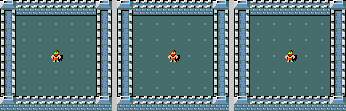

In [3]:
des_file = """
MAZE: "mylevel",' '
INIT_MAP:solidfill,' '
GEOMETRY:center,center
MAP
-------
|.....|
|.....|
|.....|
|.....|
|.....|
-------
ENDMAP
REGION:(0,0,6,6),lit,"ordinary"
BRANCH:(3,3,3,3),(0,0,0,0)
OBJECT:('/',"cold"),(3,3)
"""
render_des_file(des_file, n_images=3)

### angled reflections
```|......        |......        |.../..
|..c...        |..c...        |..%...
|......        |./....        |./....
|b.....        |%.....        |%.....
|a.....        \a.....        |a..... 
|\.....        |\.....        |......
|.\....        |......        |......
|..@...        |..@...        |..@...
Ray heading    Ray hits       Ray also will
up-left        wall, misses   hit c if able
               a, hitting b
```

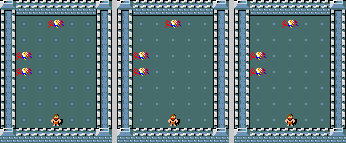

In [4]:
des_file = """
MAZE: "mylevel",' '
INIT_MAP:solidfill,' '
GEOMETRY:center,center
MAP
-------
|.....|
|.....|
|.....|
|.....|
|.....|
|.....|
|.....|
-------
ENDMAP
REGION:(0,0,6,8),lit,"ordinary"
BRANCH:(3,7,3,7),(0,0,0,0)
OBJECT:('/',"cold"),(3,7)
MONSTER: ('x', "grid bug"),(1,3),asleep
MONSTER: ('x', "grid bug"),(1,4),asleep
MONSTER: ('x', "grid bug"),(3,1),asleep
"""
render_des_file(des_file, n_images=3)

### convex (or "external") corner
If the ray hits a convex (or "external") corner, the ray reflects randomly between 3 cases: it has 1/20 chance of reflecting straight back; a 19/40 chance of reflecting left, and a 19/40 chance of reflecting right.
```Reflecting back
    ┌----           ┌---- 
    |..a.           |..a.
    |....           |....
    |....           |....
┌---┘....       ┌---\....              
|....\...       |....\...
|.....\..       |.....\..
|b.....@.       |b.....%.
                Ray is returned
                to its sender
Reflecting left
    ┌----           ┌---- 
    |..a.           |..a.
    |....           |....
    |....           |....
┌---┘....       ┌---\....              
|....\...       |../.\...
|.....\..       |./...\..
|b.....@.       |%.....@.
                Ray reflects
                90 degrees "left",
                hitting b

Reflecting right
    ┌----           ┌---- 
    |..a.           |..%.
    |....           |./..
    |....           |/...
┌---┘....       ┌---\....            
|....\...       |....\...
|.....\..       |.....\..
|b.....@.       |b.....@.
                Ray reflects
                90 degrees "right"
                hitting a
```

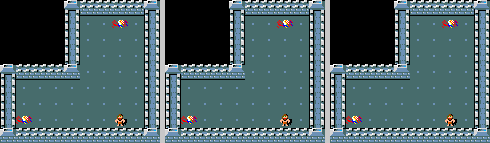

In [5]:
des_file = """
MAZE: "mylevel",' '
INIT_MAP:solidfill,' '
GEOMETRY:center,center
MAP
    ------
    |....|
    |....|
    |....|
-----....|
|........|
|........|
|........|
----------
ENDMAP
REGION:(0,0,9,8),lit,"ordinary"
BRANCH:(7,7,7,7),(0,0,0,0)
OBJECT:('/',"cold"),(7,7)
MONSTER: ('x', "grid bug"),(7,1),asleep
MONSTER: ('x', "grid bug"),(1,7),asleep
"""
render_des_file(des_file, n_images=3)